### **Descripcón:**

Esta es la consolda de una función procesa un archivo GPX y un archivo GeoJSON, y aplica un buffer a los datos del GeoJSON.
    
**Parámetros:**

- gpx_path (str): La ruta del archivo GPX.
- geojson_path (str): La ruta del archivo GeoJSON.
- buffer_size (float): El tamaño del buffer a aplicar a los datos del GeoJSON en metros.
    
**Retorna:**

- Directorios: Por cada filtro produce una carpeta que contiene los resultados de la funcion.
- GeoDataFrame: Por cada uno de los filtros establecidos el programa retorna un GeoDataFrame con los resultados de la unión espacial entre los puntos del GPX y los datos del GeoJSON con buffer.
- Grafico: Por cada filtro se crea un grafico con la union espacial que se realizo
    
### Ejemplo de uso:



##### 1. Importar librerias y funciones

In [1]:
# Importar librerias
import gpxpy as gpxpy
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import sys  # Asegúrate de importar el módulo sys

# Importar funciones del programa
working_directory = r"C:\Users\User\Desktop\Bikelane_CNN\Functions"
os.chdir(working_directory)
print("Current Working Directory:", os.getcwd())
sys.path.append(working_directory)

# Importar la función correctamente sin la extensión .py
from gpx_geojson_loader import gpx_geojson_loader
from filter_gpx_data import filter_gpx_data
from video_frame_extractor import extract_frames_from_geojson

Current Working Directory: C:\Users\User\Desktop\Bikelane_CNN\Functions


##### 2. Cargar archivos y establecer directorio de resultados

In [2]:
#Data sets
# Data sets
geojson_path = os.path.join(working_directory, "..", "Data", "33 pocuro.geojson")
gpx_path = os.path.join(working_directory, "..", "Data", "EO_1.gpx")
mp4_path = os.path.join(working_directory, "..", "Data", "EO_1.mp4")

print(geojson_path)
print(gpx_path)
print(mp4_path)

C:\Users\User\Desktop\Bikelane_CNN\Functions\..\Data\33 pocuro.geojson
C:\Users\User\Desktop\Bikelane_CNN\Functions\..\Data\EO_1.gpx
C:\Users\User\Desktop\Bikelane_CNN\Functions\..\Data\EO_1.mp4


##### 3. Parametros

In [9]:
# Conditions to filter , buffer size, name of the file output

conditions = [
    ("df['ci_o_cr'] == 0", 10, "ci_o_cr_0"),
    ("df['ci_o_cr'] == 1", 2, "ci_o_cr_1"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 1)", 10, "ci_o_cr_1_senalzd_1"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 2)", 10, "ci_o_cr_1_senalzd_2"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 3)", 10, "ci_o_cr_1_senalzd_3"),
    ("df['tipci'] == 'CA'", 30, "tipci_CA"),
    ("df['tipci'] == 'PAR'", 1, "tipci_PAR"),
    ("df['tipci'] == 'VD'", 2, "tipci_VD"),
    ("df['tipci'] == 'BAND'", 3, "tipci_BAND"),
    ("df['op_ci'] == 0", 10, "op_ci_0"),
    ("df['op_ci'] == 1", 10, "op_ci_1")
]


##### 4. Llamada

In [4]:
geo_gpx_df, geojson_df = gpx_geojson_loader(gpx_path, geojson_path)

# Now you can use geo_gpx_df and geojson_df as needed
print(geo_gpx_df.head())
print(geojson_df.head())


DataFrame with 'time' column:
    latitude  longitude                        timestamp  \
0 -33.425957 -70.577241 2022-04-02 15:15:30.537000+00:00   
1 -33.425957 -70.577241 2022-04-02 15:15:30.709000+00:00   
2 -33.425957 -70.577242 2022-04-02 15:15:30.858000+00:00   
3 -33.425957 -70.577242 2022-04-02 15:15:31.008000+00:00   
4 -33.425957 -70.577242 2022-04-02 15:15:31.158000+00:00   

                      geometry   time  
0  POINT (-70.57724 -33.42596)  0.000  
1  POINT (-70.57724 -33.42596)  0.172  
2  POINT (-70.57724 -33.42596)  0.321  
3  POINT (-70.57724 -33.42596)  0.471  
4  POINT (-70.57724 -33.42596)  0.621  
    latitude  longitude                        timestamp  \
0 -33.425957 -70.577241 2022-04-02 15:15:30.537000+00:00   
1 -33.425957 -70.577241 2022-04-02 15:15:30.709000+00:00   
2 -33.425957 -70.577242 2022-04-02 15:15:30.858000+00:00   
3 -33.425957 -70.577242 2022-04-02 15:15:31.008000+00:00   
4 -33.425957 -70.577242 2022-04-02 15:15:31.158000+00:00   

       

Este es la columna filtro: geojson_df['ci_o_cr'] == 0
Largo de resultado: 24


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


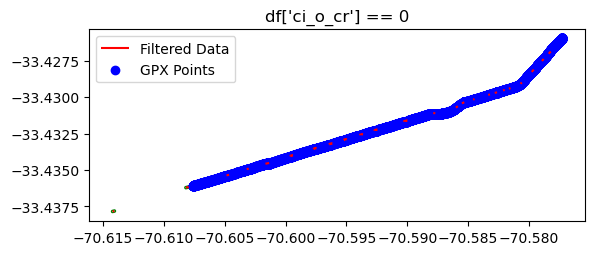

Largo df filtrada: 24
Filtered data saved to filtered_data\ci_o_cr_0\ci_o_cr_0.geojson
Este es la columna filtro: geojson_df['ci_o_cr'] == 1
Largo de resultado: 25


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


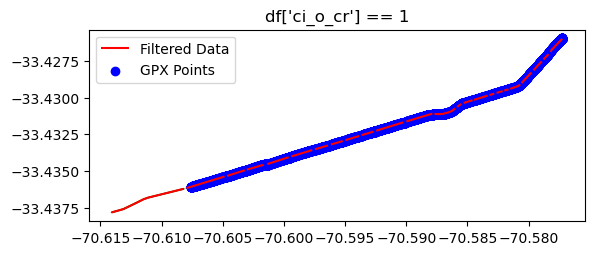

Largo df filtrada: 25
Filtered data saved to filtered_data\ci_o_cr_1\ci_o_cr_1.geojson
Este es la columna filtro: (geojson_df['ci_o_cr'] == 0) & (geojson_df['senalzd'] == 1)
Largo de resultado: 1


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


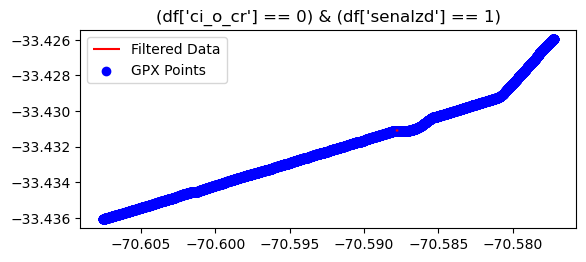

Largo df filtrada: 1
Filtered data saved to filtered_data\ci_o_cr_1_senalzd_1\ci_o_cr_1_senalzd_1.geojson
Este es la columna filtro: (geojson_df['ci_o_cr'] == 0) & (geojson_df['senalzd'] == 2)
Largo de resultado: 4


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


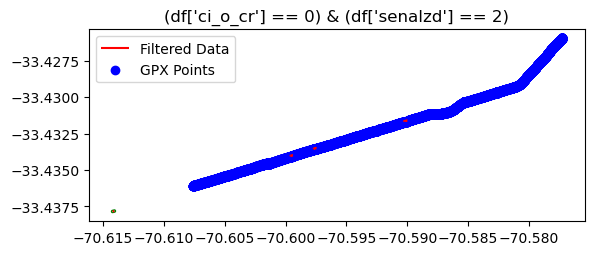

Largo df filtrada: 4
Filtered data saved to filtered_data\ci_o_cr_1_senalzd_2\ci_o_cr_1_senalzd_2.geojson
Este es la columna filtro: (geojson_df['ci_o_cr'] == 0) & (geojson_df['senalzd'] == 3)
Largo de resultado: 19


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


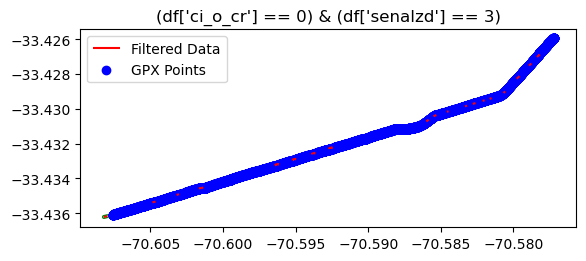

Largo df filtrada: 19
Filtered data saved to filtered_data\ci_o_cr_1_senalzd_3\ci_o_cr_1_senalzd_3.geojson
Este es la columna filtro: geojson_df['tipci'] == 'CA'
Largo de resultado: 22


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


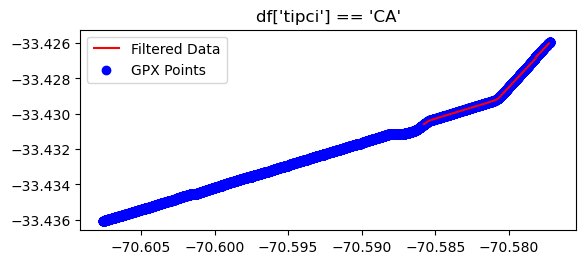

Largo df filtrada: 22
Filtered data saved to filtered_data\tipci_CA\tipci_CA.geojson
Este es la columna filtro: geojson_df['tipci'] == 'PAR'
Largo de resultado: 19


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


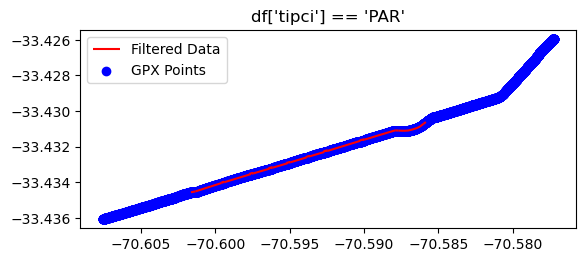

Largo df filtrada: 19
Filtered data saved to filtered_data\tipci_PAR\tipci_PAR.geojson
Este es la columna filtro: geojson_df['tipci'] == 'VD'
Largo de resultado: 8


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


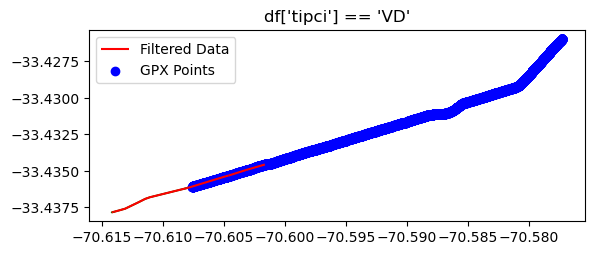

Largo df filtrada: 8
Filtered data saved to filtered_data\tipci_VD\tipci_VD.geojson
Este es la columna filtro: geojson_df['tipci'] == 'BAND'
Largo de resultado: 0
No data found for this condition. Skipping the rest of the function.
No data found for condition: df['tipci'] == 'BAND'. Skipping this iteration.
Este es la columna filtro: geojson_df['op_ci'] == 0
Largo de resultado: 49


C:\Users\User\Desktop\Bikelane_CNN\Functions\filter_gpx_data.py:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


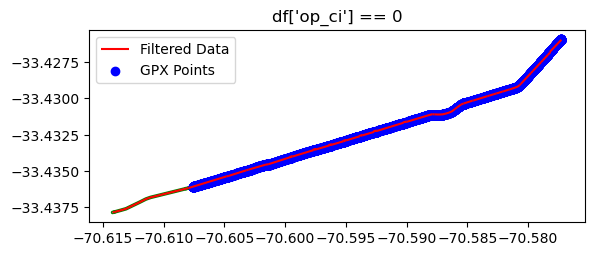

Largo df filtrada: 49
Filtered data saved to filtered_data\op_ci_0\op_ci_0.geojson
Este es la columna filtro: geojson_df['op_ci'] == 1
Largo de resultado: 0
No data found for this condition. Skipping the rest of the function.
No data found for condition: df['op_ci'] == 1. Skipping this iteration.


In [10]:
output_folder = "filtered_data"
os.makedirs(output_folder, exist_ok=True)

for condition, buffer_size, folder_name in conditions:
    filtered_gpx_data = filter_gpx_data(geo_gpx_df, geojson_df, condition, buffer_size)

    # Skip this iteration if filtered_gpx_data is None or empty
    if filtered_gpx_data is None or filtered_gpx_data.empty:
        print(f"No data found for condition: {condition}. Skipping this iteration.")
        continue

    folder_path = os.path.join(output_folder, folder_name)
    os.makedirs(folder_path, exist_ok=True)
    output_file = os.path.join(folder_path, f"{folder_name}.geojson")
    filtered_gpx_data.to_file(output_file, driver='GeoJSON')
    print(f"Filtered data saved to {output_file}")

##### Function: `extract_frames_from_geojson`
This function takes in three arguments:
- `geojson_path`: Path to the GeoJSON file containing timestamps.
- `video_path`: Path to the video file.
- `output_dir`: Directory where extracted frames will be saved.

##### Steps
1. **Load GeoJSON Data**: Reads the GeoJSON file and extracts timestamps from the `time` column.
2. **Directory Setup**: Creates the output directory if it doesn’t already exist.
3. **Video Setup**: Opens the video file using OpenCV.
4. **Frame Extraction Loop**:
   - For each timestamp:
     - Sets the video position to the timestamp (converted to seconds).
     - Reads and saves the frame at that timestamp.
     - Logs progress, showing the percentage completed and elapsed time.
5. **Error Handling**: If a frame cannot be read, logs a failure message for that timestamp.
6. **Cleanup**: Releases the video capture object after processing.

##### Example Usage
```python
extract_frames_from_geojson(
    geojson_path="path/to/geojson_file.geojson",
    video_path="path/to/video_file.mp4",
    output_dir="path/to/output_directory"
)


In [ ]:
import os
from video_frame_extractor import extract_frames_from_geojson

# Constants
video_path = 'C:/Users/User/Desktop/Bikelane_CNN/Data/EO_1.mp4'
filtered_data_folder = 'C:/Users/User/Desktop/Bikelane_CNN/Data/filtered_data'

# Iterate through each subfolder in the filtered_data folder
for root, dirs, files in os.walk(filtered_data_folder):
    for file in files:
        if file.endswith('.geojson'):
            geojson_path = os.path.join(root, file)
            
            # Create a directory to save the extracted frames
            output_dir = os.path.join(root, 'frames')
            
            # Run the video frame extractor function
            extract_frames_from_geojson(geojson_path, video_path, output_dir)

Processing C:/Users/User/Desktop/Bikelane_CNN/Data/filtered_data\ci_o_cr_0\ci_o_cr_0.geojson with 5894 timestamps.
Progress: 0.02% - Elapsed Time: 0.40 seconds
Progress: 0.03% - Elapsed Time: 0.67 seconds
Progress: 0.05% - Elapsed Time: 0.95 seconds
Progress: 0.07% - Elapsed Time: 1.20 seconds
Progress: 0.08% - Elapsed Time: 1.47 seconds
Progress: 0.10% - Elapsed Time: 1.73 seconds
Progress: 0.12% - Elapsed Time: 1.97 seconds
Progress: 0.14% - Elapsed Time: 2.23 seconds
Progress: 0.15% - Elapsed Time: 2.49 seconds
Progress: 0.17% - Elapsed Time: 2.76 seconds
Progress: 0.19% - Elapsed Time: 3.03 seconds
Progress: 0.20% - Elapsed Time: 3.29 seconds
Progress: 0.22% - Elapsed Time: 3.53 seconds
Progress: 0.24% - Elapsed Time: 3.79 seconds
Progress: 0.25% - Elapsed Time: 4.04 seconds
Progress: 0.27% - Elapsed Time: 4.31 seconds
Progress: 0.29% - Elapsed Time: 4.58 seconds
Progress: 0.31% - Elapsed Time: 4.86 seconds
Progress: 0.32% - Elapsed Time: 5.14 seconds
Progress: 0.34% - Elapsed Time